In [7]:
from astropy.table import Table  
import numpy as np

data_table = Table.read('C:/Users/dougl/Desktop/table5.fits', format = 'fits')
print(data_table[1].columns)

<TableColumns names=('source_id','Jr','Jphi','Jz','Theta_r','Theta_phi','Theta_z','Freq_r','Freq_phi','Freq_z')>


In [20]:
print(data_table)

    source_id                Jr          ...        Freq_z       
                         kpc2 / Myr      ...       1 / Myr       
------------------ --------------------- ... --------------------
     2851858288640    0.1529523461384003 ...  0.06632169849429587
     3332894779520   0.04645195420170135 ... 0.061975446375025105
     7632157690368  0.050695269335430226 ...  0.05464019833362681
     9281425163264  0.011550846948576492 ...  0.06384610272737319
    12545600306304   0.03418128225496954 ...  0.04582595918266035
    13301514552192  0.019592280225016634 ...  0.06584226205624126
    13473313244288   0.08676567465404654 ... 0.041740273059027166
    15530601898496 0.0063495519589812826 ... 0.051036507880944784
    15637976759168  0.010011993303733938 ...   0.0608212269432373
    15741055975040  0.033430743744630335 ...  0.03811788938272971
               ...                   ... ...                  ...
205629500695518336  0.003225422085183835 ...  0.07057281878717421
2056316954

In [8]:
source = np.array(data_table["source_id"])
Jr = np.array(data_table["Jr"])
Jphi = np.array(data_table["Jphi"])
Jz = np.array(data_table["Jz"])

In [9]:
data2 = Table.read('C:/Users/dougl/Desktop/Marchetti data/data.fits', format = 'fits')
source_M = np.array(data2["source_id"])

In [52]:
idx = np.zeros(len(source))
i = 0
j = 0
z = 0

while ((i < len(source)) & (j < len(source_M))):
    if (source[i] == source_M[j]):
        idx[z] = int(j)
        i = i+1
        j = j+1
        z = z+1
    elif (source[i] < source_M[j]):
        i = i+1
    else:
        j = j+1

In [53]:
U = np.zeros(len(idx))
V = np.zeros(len(idx))
W = np.zeros(len(idx))
X = np.zeros(len(idx))
Y = np.zeros(len(idx))
Z = np.zeros(len(idx))

idx = np.array(idx)
idx = idx.astype(int)
j = 0
for i in idx:
    U[j] = data2["U"][i]
    V[j] = data2["V"][i]
    W[j] = data2["W"][i]
    X[j] = data2["xGC"][i]*0.01
    Y[j] = data2["yGC"][i]*0.01
    Z[j] = data2["zGC"][i]*0.01
    j = j+1

X = X + 8
Z = Z - 0.025

print(U)

[-29.80110894  17.90374393  -9.43973928 ... -29.80110894 -29.80110894
 -29.80110894]


In [63]:
R = X**2 + Y**2 #kpc

V_rad = (U*X + V*Y)/(R) #km/s
V_phi = (X*V - Y*U)/(R) #km/s

Lz = (X*V - Y*U) #kpc km/s

print(Lz)
print(Jr)

[-20740.86671615 -16541.15240419 -16636.40152447 ... -20740.86671615
 -20740.86671615 -20740.86671615]
[0.15295235 0.04645195 0.05069527 ... 0.01025371 0.00209915 0.00487837]


Text(0,0.5,'Lz')

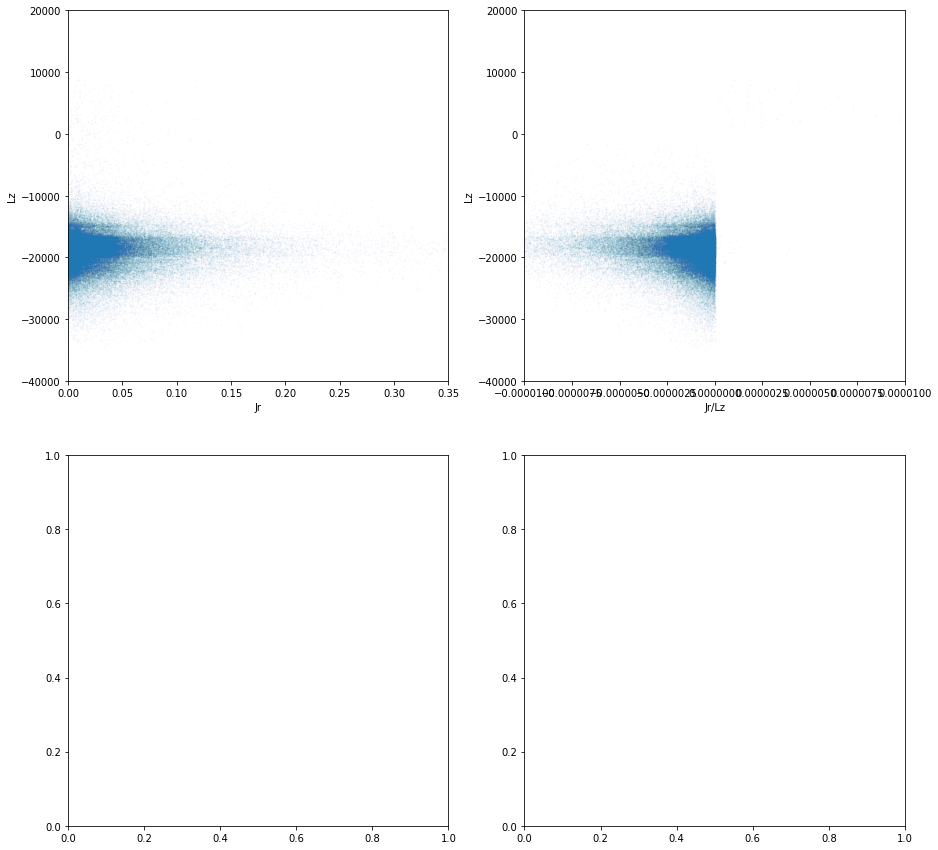

In [79]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize=(15,15))

axs[0, 0].scatter(Jr, Lz, s=0.2, alpha=0.05)
axs[0, 0].axis([0, 0.35, -40000, 20000])
axs[0, 0].set_xlabel("Jr")
axs[0, 0].set_ylabel("Lz")

axs[0, 1].scatter(Jr/Lz, Lz, s=0.2, alpha=0.05)
axs[0, 1].axis([-1e-5, 1e-5, -40000, 20000])
axs[0, 1].set_xlabel("Jr/Lz")
axs[0, 1].set_ylabel("Lz")